# Basic Data Science - Day 1
Dibuat dan dipaparkan oleh:

<img src="https://hmtt-telco.com/wp-content/uploads/2018/05/IMV.png" width="200px"/>

© 2021 Image Processing and Vision Laboratory

[Instagram](https://www.instagram.com/imv.laboratory) |  [LinkedIn](https://www.linkedin.com/company/imv-laboratory/)  |  [OA Line](http://line.me/ti/p/@uyy9001n) | [Website](https://www.imvlaboratory.com)
<br/>
<br/>

<h1>Project - Stroke Prediction<h1>

---


***Untuk menyelesaikan permasalahan Supervised Learning - Classification***

In [1]:
# update modul python terbaru
!pip install -U imbalanced-learn

# 1.Pemahaman Data *(Data Understanding)*

Pemahaman Data *(Data Understanding)* berupa memahami lebih jauh tentang data yang dikumpulkan sebelumnya dan memeriksa jenis masing-masing data dan mempelajari lebih lanjut tentang atribut(feature) dan namanya.

## 1.1 *Data Loading*

Proses loading data menggunakan library pandas untuk membaca file datanya (file csv).

In [2]:
# mengimport library yang akan digunakan

# untuk pengolahan data
import numpy as np
import pandas as pd

# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Memuat data pada sebuah DataFrame menggunakan pandas
df = pd.read_csv('https://gist.githubusercontent.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04/raw/cec0340503d82d270821e03254993b6dede60afb/healthcare-dataset-stroke-data.csv')
df.drop(columns='id', inplace=True) # variabel id bersifat unik yang isinya berbeda-beda
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

Terdapat 5.110 baris (records atau jumlah pengamatan) dan 11 kolom dalam dataset.

## 1.2 *Data Cleaning*

*Data Cleaning* adalah membuang data dan informasi yang tidak dibutuhkan sehingga akan mendapatkan data berkualitas.


1. Konsisten Format - Penulisan format harus konsisten agar tidak menimbulkan makna yang berbeda. Jogja - DIY - Daerah Istimewa Yogyakarta - Yogyakarta - Jogjakarta

2. Missing Value - Data dari record tidak lengkap (NaN). Cara mengatasi dengan menghilangkan data tersebut atau mengganti missing value dengan mean atau modus atau median.

3. Duplikasi Data - Data yang duplikat. Cara mengatasi dengan menghilangkan data duplikat kemudian menyisahkan satu data.



In [4]:
# Fungsi yang memuat informasi pada DataFrame
def report(df):
  col = []
  d_type = []
  uniques = []
  n_uniques = []

  for i in df.columns:
    col.append(i) # Nama Column
    d_type.append(df[i].dtypes) # Tipe Data
    uniques.append(df[i].unique()[:5]) # 5 Elemen teratas pada variabel
    n_uniques.append(df[i].nunique()) # Jumlah elemen pada variabel

  return pd.DataFrame({'Column': col, 'd_type':d_type, 'unique_sample':uniques, 'n_unique_sample':n_uniques})

In [5]:
report(df)

Column   d_type  \
0              gender   object   
1                 age  float64   
2        hypertension    int64   
3       heart_disease    int64   
4        ever_married   object   
5           work_type   object   
6      Residence_type   object   
7   avg_glucose_level  float64   
8                 bmi  float64   
9      smoking_status   object   
10             stroke    int64   

                                        unique_sample  n_unique_sample  
0                               [Male, Female, Other]                3  
1                      [67.0, 61.0, 80.0, 49.0, 79.0]              104  
2                                              [0, 1]                2  
3                                              [1, 0]                2  
4                                           [Yes, No]                2  
5   [Private, Self-employed, Govt_job, children, N...                5  
6                                      [Urban, Rural]                2  
7            [228.69, 202.21, 105.92, 171.23, 174.12]             3979  
8                       [36.6, nan, 32.5, 34.4, 24.0]              418  
9    [formerly smoked, never smoked, smokes, Unknown]                4  
10                                             [1, 0]                2

In [6]:
# Untuk mengetahui informasi pada DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Untuk mengetahui elemen pada variabel dapat menggunakan unique()

In [7]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [8]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

Terdapat data yang merupakan salah entri maka dari itu kita mengubah data tersebut menjadi data kosong (NaN)

In [10]:
df.gender.replace('Other', np.nan, inplace=True)
df.smoking_status.replace('Unknown', np.nan, inplace=True)
df.work_type.replace('children', np.nan, inplace=True)

Untuk memudahkan dalam visualisasi maka kita mengubah 0 menjadi no dan 1 menjadi yes.

In [11]:
df.stroke.replace(0,'no', inplace=True)
df.stroke.replace(1,'yes', inplace=True)

df.hypertension.replace(0,'no', inplace=True)
df.hypertension.replace(1,'yes', inplace=True)

df.heart_disease.replace(0,'no', inplace=True)
df.heart_disease.replace(1,'yes', inplace=True)

In [12]:
# Menghitung jumlah data kosong (NaN) pada setiap kolom dapat menggunakan isnull() atau isna()
df.isnull().sum()

gender                  1
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type             687
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [13]:
# Membuang data kosong (NaN)
df.dropna(inplace=True)

In [14]:
# Melakukan reset index menggunakan reset_index()
df.reset_index(inplace=True, drop=True)

In [15]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
# Menghitung data yang merupakan data duplikat
df.duplicated().sum()

0

## 1.3 Eksplanatory Data Analysis

Explanatory Data Analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

### 1.3.1 Deskripsi Variabel

Deskripsi variabel dari data Stroke Prediction sebagai berikut.

| Variabel | Deskripsi |
| :--- | :--- |
| gender | jenis kelamin |
| age | umur |
| hypertension | hipertensi |
| heart_disease | penyakit jantung |
| ever_married | pernah menikah |
| work_type | tipe pekerjaan |
| Residence_type | tipe tempat tinggal |
| avg_glucose_level | kadar rata-rata  glukosa |
| bmi | angka indeks massa tubuh atau body mass index (BMI) digunakan untuk menunjukkan kategori berat badan |
| smoking_status | status merokok |
| stroke | penyakit stroke |

In [17]:
report(df)

Column   d_type  \
0              gender   object   
1                 age  float64   
2        hypertension   object   
3       heart_disease   object   
4        ever_married   object   
5           work_type   object   
6      Residence_type   object   
7   avg_glucose_level  float64   
8                 bmi  float64   
9      smoking_status   object   
10             stroke   object   

                                       unique_sample  n_unique_sample  
0                                     [Male, Female]                2  
1                     [67.0, 80.0, 49.0, 79.0, 81.0]               70  
2                                          [no, yes]                2  
3                                          [yes, no]                2  
4                                          [Yes, No]                2  
5   [Private, Self-employed, Govt_job, Never_worked]                4  
6                                     [Urban, Rural]                2  
7           [228.69, 105.92, 171.23, 174.12, 186.21]             2861  
8                     [36.6, 32.5, 34.4, 24.0, 29.0]              364  
9            [formerly smoked, never smoked, smokes]                3  
10                                         [yes, no]                2

visualisasi data agar tampilan informasi lebih jelas dan efisien.

Visualisasi data biasanya menggunakaan library matplotlib dan seaborn

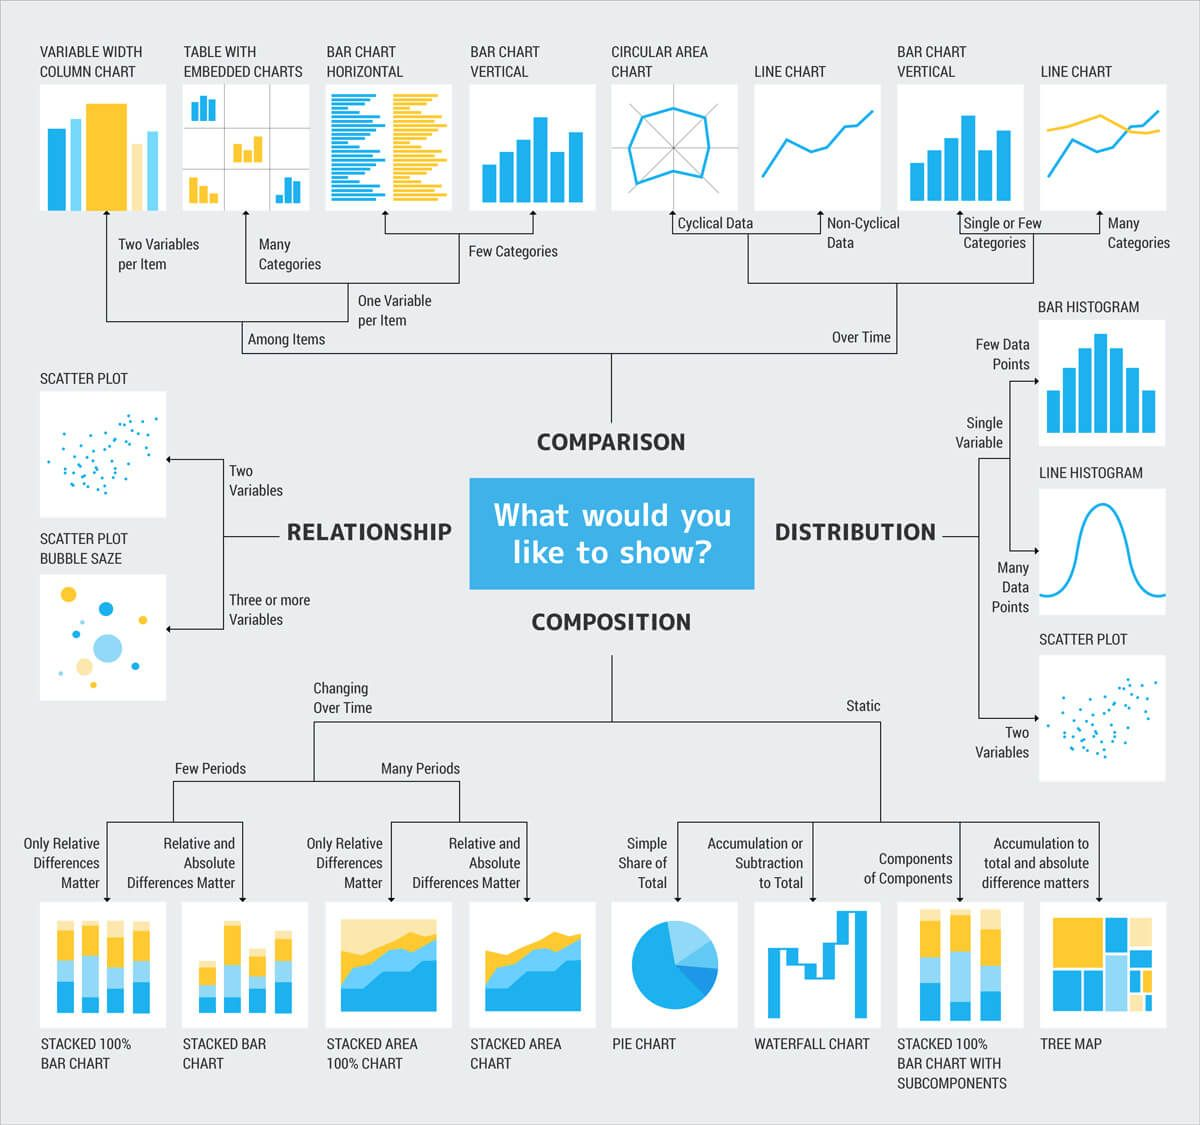

Keterangan:
1.	Perbandingan/Komparasi untuk membandingkan suatu kumpulan data. Untuk data numerik biasanya berupa line-chart. Sedangkan data kategori, lebih cocok menggunakan bar-chart.
2.	Distribusi untuk melihat distribusi/persebarab data di suatu variabel biasanya berupa histogram. Untuk melihat distribusi di dua variabel menggunakan scatterplot.
3.	Komposisi untuk melihat komposisi dari suatu variabel. Untuk data numerik biasanya menggunakan stacked line-chart dan untuk data kategori biasanya menggunakan stacked bar-chart.
4.	Keterhubungan/Relasi untuk melihat keterhubungan antara suatu variabel dengan variabel lain biasanya berupa scatterplot atau heatmap. 


### 1.3.2 Univariate Analysis

*Univariate Analysis* adalah metode yang digunakan untuk menganalisis dan mengeskplorasi data yang berisikan satu variabel dari suatu kumpulan data.

Sebelum melakukan *Univariate Analysis*, perlu membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

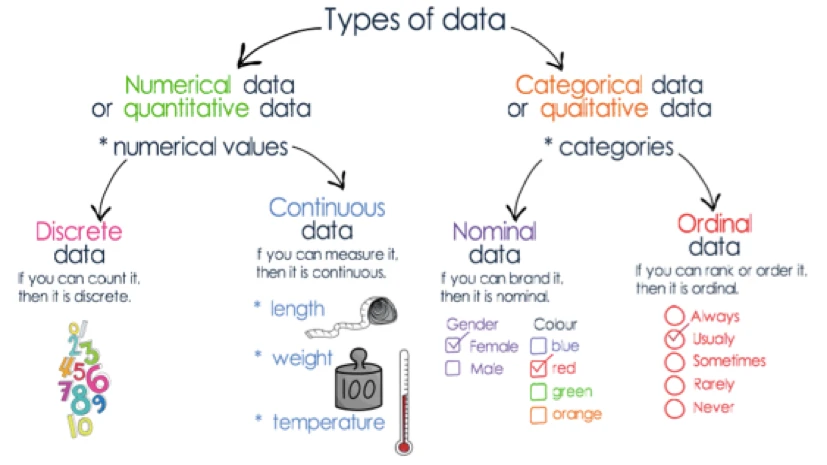

In [18]:
# Fitur Kategori
categorical_features = list(df.loc[:, df.dtypes=='object'].columns)
categorical_features

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [19]:
# Fitur Numerik
numerical_features = list(df.loc[:, df.dtypes!='object'].columns)
numerical_features

['age', 'avg_glucose_level', 'bmi']

#### 1.3.2.1 Data Kategori

In [20]:
# Untuk mengetahui jumlah pada variabel, dapat menggunakan value_counts()
df.stroke.value_counts()

no     3177
yes     180
Name: stroke, dtype: int64

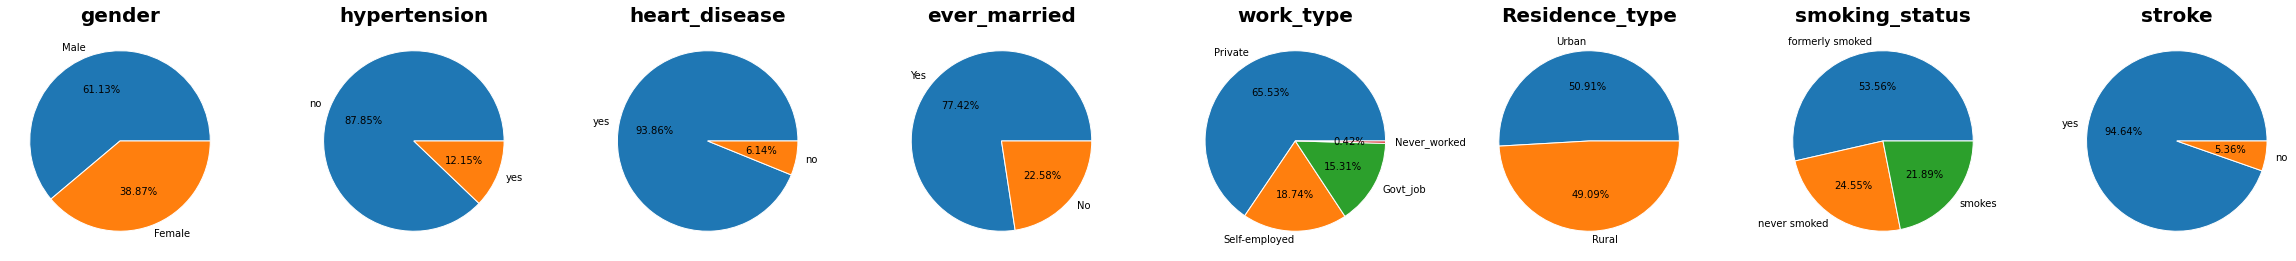

In [21]:
# Analisa terhadap fitur kategori

fig, axs = plt.subplots(ncols=len(categorical_features), figsize= (32,16))
i=0
for feature in categorical_features:
  axs[i].pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%.2f%%', wedgeprops=dict(edgecolor='white'))
  axs[i].set_title(feature, fontsize=20, ha='center', fontweight='bold')
  i+=1
  plt.tight_layout()
plt.show()

#### 1.3.2.2 Data Numerik

In [22]:
# Memuat informasi statistik pada fitur numerik
df.describe().T

count        mean        std    min    25%    50%     75%  \
age                3357.0   49.387251  18.310513  13.00  35.00  50.00   63.00   
avg_glucose_level  3357.0  108.444284  47.921392  55.12  77.19  92.34  116.14   
bmi                3357.0   30.439529   7.249738  11.50  25.40  29.20   34.20   

                      max  
age                 82.00  
avg_glucose_level  271.74  
bmi                 92.00

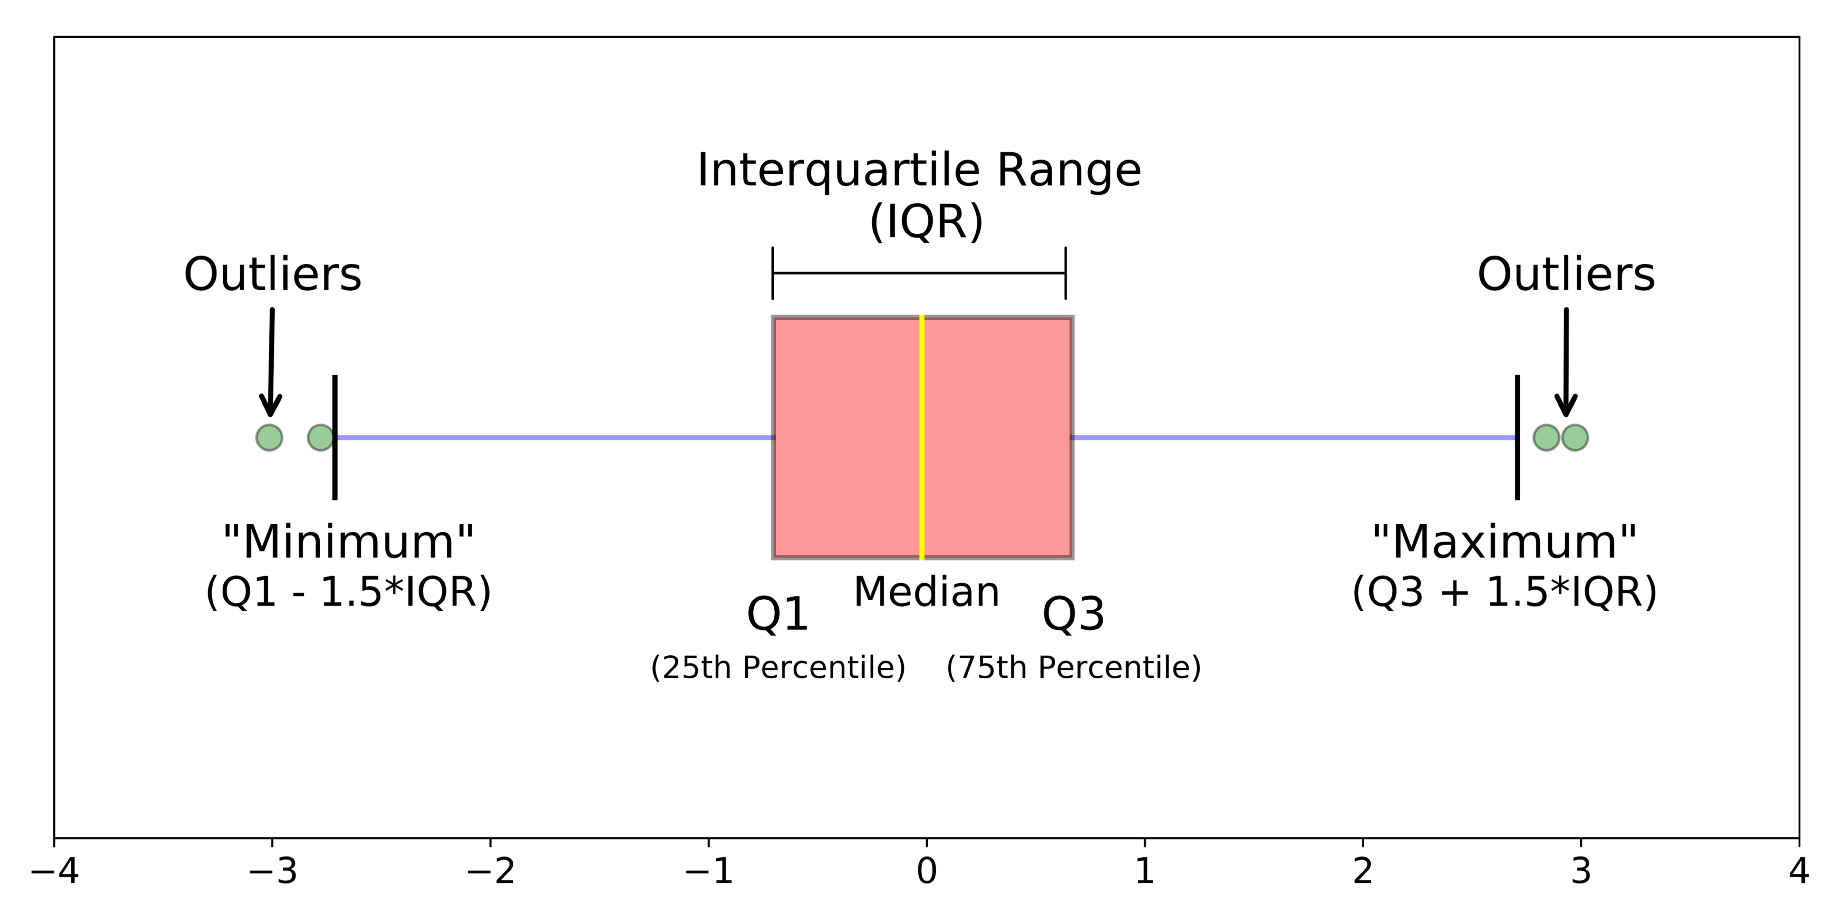

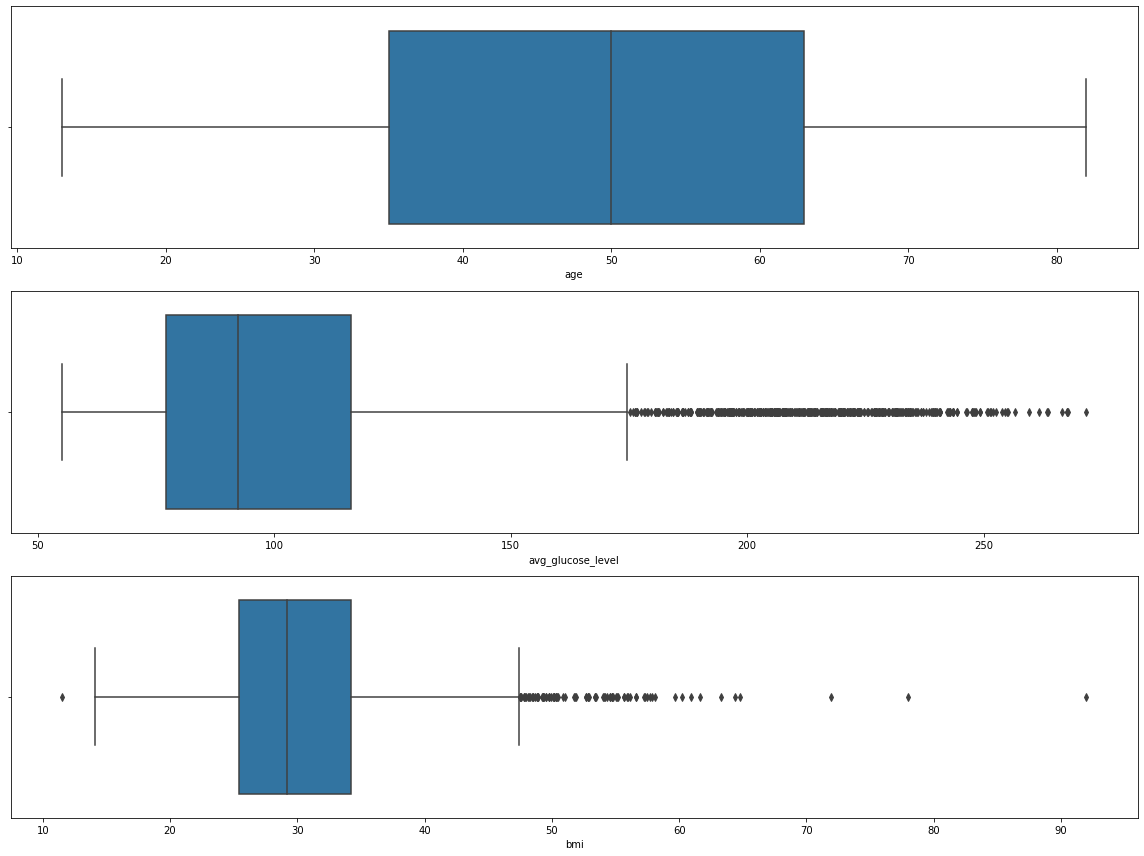

In [23]:
# Mengetahui Outlier pada Fitur Numerik
fig, axs = plt.subplots(len(numerical_features), figsize= (16,12))
i=0
for feature in numerical_features:
  sns.boxplot(df[feature], ax=axs[i])
  i+=1
  plt.tight_layout()
plt.show()

Ada beberapa teknik untuk menangani outliers, antara lain:

1. [*Local Outlier Factor*](https://ichi.pro/id/deteksi-anomali-dengan-local-outlier-factor-lof-238723977384178)
2. [Z-score method](https://www.youtube.com/watch?v=KFuEAGR3HS4)
3. [IQR Method](https://stevkarta.medium.com/mendeteksi-univariate-outliers-dengan-metode-iqr-python-3adfad87de82)

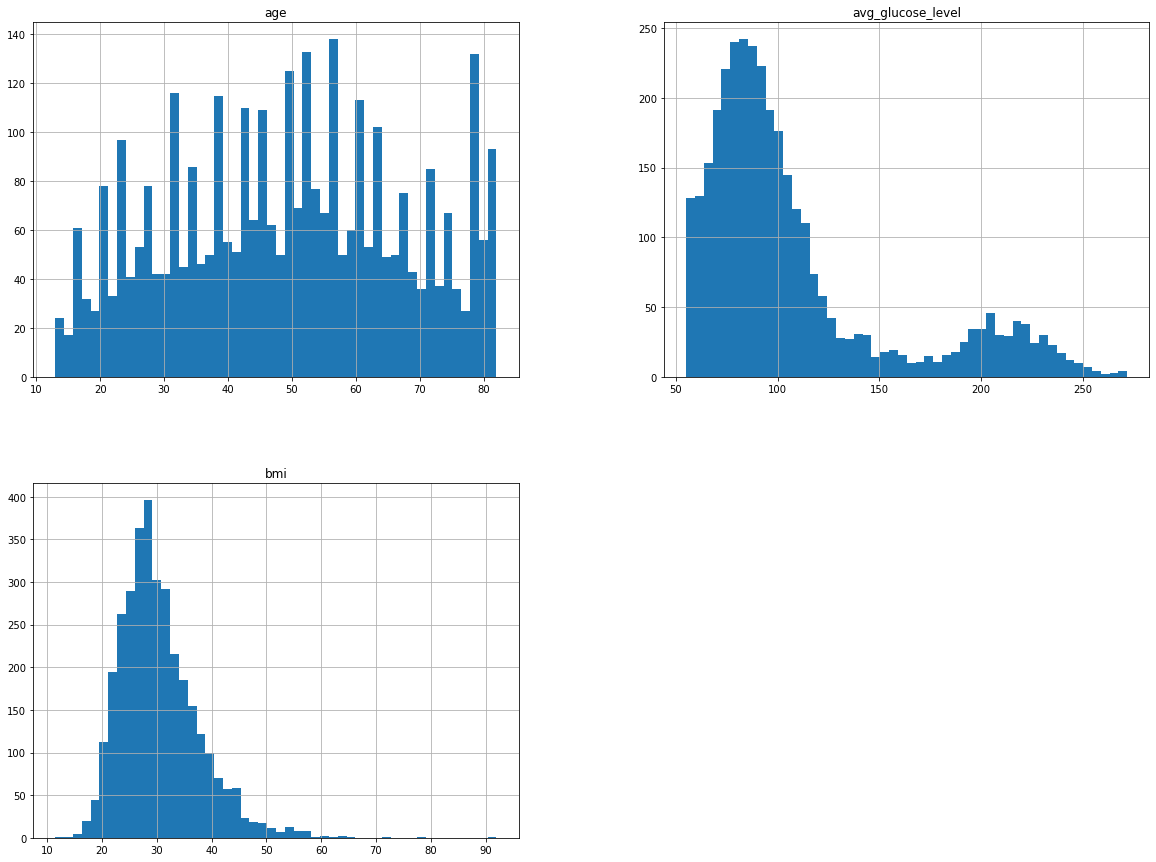

In [24]:
# Analisa terhadap fitur numerik
df.hist(bins=50, figsize=(20,15))
plt.show()

### 1.3.3 Bivariate Analysis

Bivariate Analysis, adalah metode yang bertujuan untuk melakukan perbandingan antara kedua variabel dari suatu kumpulan data. Bivariate Analysis biasanya menggunakan scatterplot dan pairplot di library seaborn. 

#### 1.3.3.1 Data Kategori

In [25]:
# Grouping data variabel target (stroke) berdasarkan variabel smoking status
by_smoking = df.groupby('stroke')['smoking_status'].value_counts().to_frame().rename(columns={'smoking_status':'Freq'}).sort_values(by='stroke', ascending=True).reset_index()
by_smoking

stroke   smoking_status  Freq
0     no     never smoked  1714
1     no  formerly smoked   767
2     no           smokes   696
3    yes     never smoked    84
4    yes  formerly smoked    57
5    yes           smokes    39

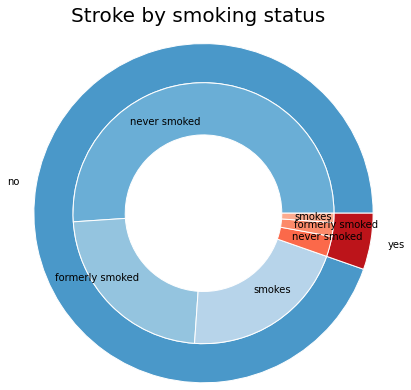

In [26]:
# Visualisasi grouping data variabel target (stroke) berdasarkan variabel smoking status

group_names=df['stroke'].value_counts().index
group_size=df['stroke'].value_counts()
subgroup_names = by_smoking['smoking_status']
subgroup_size= by_smoking['Freq']

a, b = [plt.cm.Blues, plt.cm.Reds]

fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("Stroke by smoking status", fontsize=20)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius = 1.3, labels=group_names, colors=[a(0.6), b(0.8)])
plt.setp(mypie, width=0.3, edgecolor='white')

mypie2, _ = ax.pie(subgroup_size, radius = 1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

In [27]:
# Grouping data variabel target (stroke) berdasarkan variabel smoking status dan work type
by_smoking_status_work_type = df.groupby(['smoking_status','work_type'])['stroke'].value_counts(normalize=True).to_frame().rename(columns={'stroke':'Ratio'}).sort_values(by='Ratio', ascending=False).reset_index()
by_smoking_status_work_type

smoking_status      work_type stroke     Ratio
0      never smoked   Never_worked     no  1.000000
1      never smoked        Private     no  0.961377
2      never smoked       Govt_job     no  0.960000
3            smokes       Govt_job     no  0.955752
4            smokes        Private     no  0.946850
5   formerly smoked       Govt_job     no  0.944444
6            smokes  Self-employed     no  0.938596
7   formerly smoked  Self-employed     no  0.928934
8   formerly smoked        Private     no  0.928144
9      never smoked  Self-employed     no  0.915094
10     never smoked  Self-employed    yes  0.084906
11  formerly smoked        Private    yes  0.071856
12  formerly smoked  Self-employed    yes  0.071066
13           smokes  Self-employed    yes  0.061404
14  formerly smoked       Govt_job    yes  0.055556
15           smokes        Private    yes  0.053150
16           smokes       Govt_job    yes  0.044248
17     never smoked       Govt_job    yes  0.040000
18     never smoked        Private    yes  0.038623

#### 1.3.3.2 Persebaran data di feature data numerik

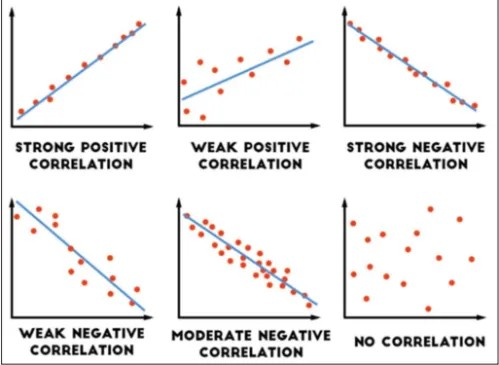

<AxesSubplot:xlabel='age', ylabel='bmi'>

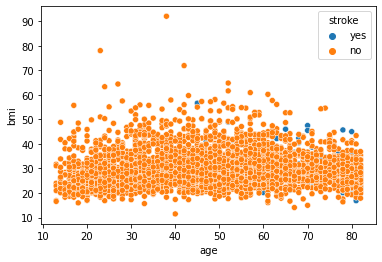

In [28]:
# visualisasi persebaran data antar variabel numerik
sns.scatterplot(x='age', y='bmi', data=df, hue='stroke')

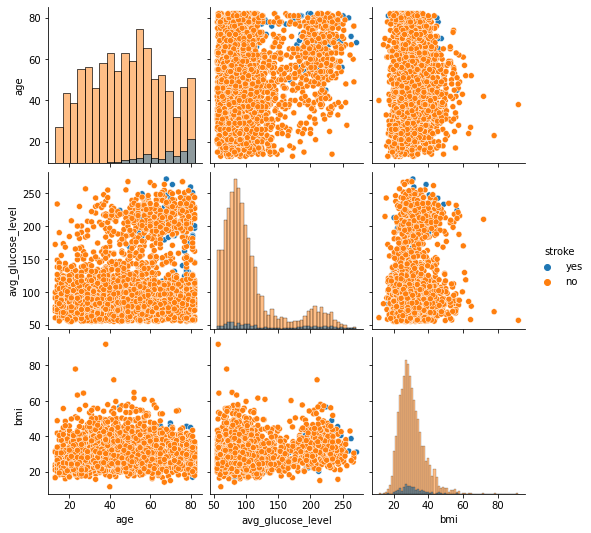

In [29]:
# Visualisasi persebaran data antar variabel numerik dan jumlah data numerik
sns.pairplot(df, hue='stroke', diag_kind="hist")

### 1.3.4 Korelasi (Heatmap)

Korelasi adalah salah satu teknik analisis dalam statistika yang digunakan untuk mencari hubungan antara dua variabel yang biasanya data numerik tetapi juga bisa untuk data kategori. Untuk mengetahui korelasi antar variabel dapat menggunakan fungsi corr() pada pandas.

In [30]:
df.corr()

age  avg_glucose_level       bmi
age                1.000000           0.238646  0.042226
avg_glucose_level  0.238646           1.000000  0.155140
bmi                0.042226           0.155140  1.000000

Untuk mempermudah dalam analisa, kita dapat menggunakan visualisasi heatmap dari seaborn untuk menampilkan korelasi data antara variabel dengan representasi warna yang berbeda-beda.

#### 1.3.4.1 Heatmap untuk Data Numerik

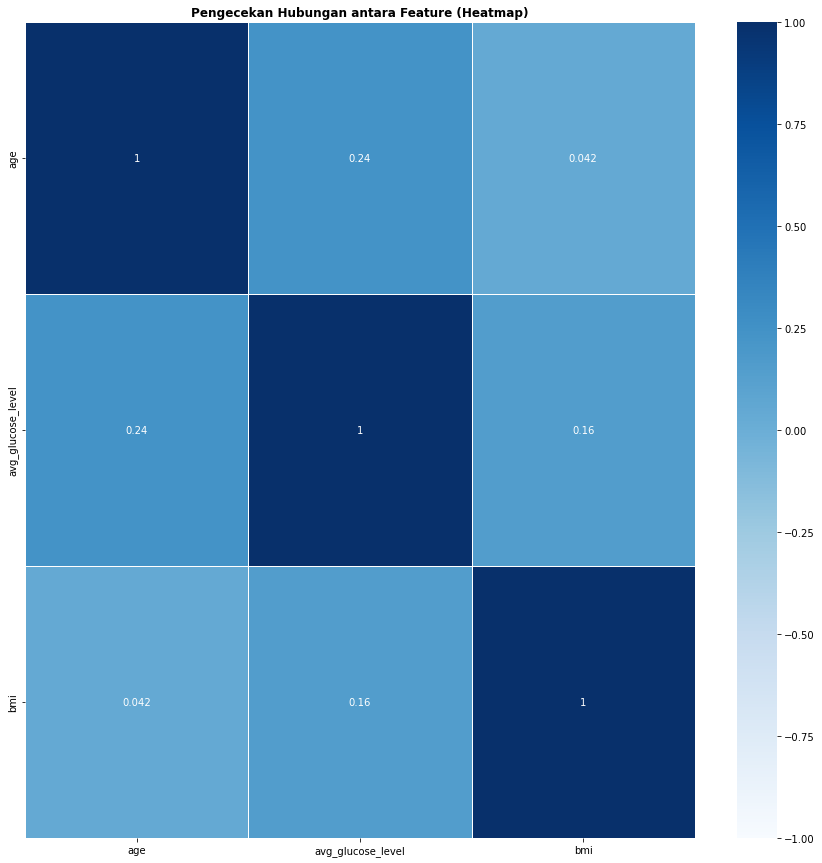

In [31]:
# Visualisasi heatmap
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=1)
ax.set_title('Pengecekan Hubungan antara Feature (Heatmap)', fontweight='bold')
plt.show()

Keterangan:
1. Semakin mendekati 1 maka fitur memiliki korelasi positif yang semakin tinggi
2. Semakin mendekati 0 maka fitur tidak memiliki korelasi
3. Semakin mendekati -1 maka fitur memiliki korelasi negatif yang semakin tinggi

# 2.Persiapan Data *(Data Preparation)*

Persiapan Data *(Data Preparation)* adalah proses mengubah atau mentransformasi fitur-fitur data ke dalam bentuk yang mudah diinterpretasikan dan diproses oleh model *machine learning*.

## 2.1 *Categorical Encoding*

*Categorical Encoding* (Encoding Fitur Kategori) adalah proses mengubah data kategori menjadi data numerik.

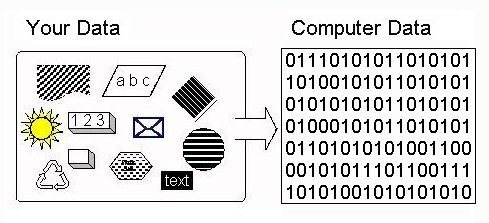

In [32]:
# Untuk mengetahui informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3357 non-null   object 
 1   age                3357 non-null   float64
 2   hypertension       3357 non-null   object 
 3   heart_disease      3357 non-null   object 
 4   ever_married       3357 non-null   object 
 5   work_type          3357 non-null   object 
 6   Residence_type     3357 non-null   object 
 7   avg_glucose_level  3357 non-null   float64
 8   bmi                3357 non-null   float64
 9   smoking_status     3357 non-null   object 
 10  stroke             3357 non-null   object 
dtypes: float64(3), object(8)
memory usage: 288.6+ KB


In [33]:
# Mengembalikan nilai pada variabel target (stroke) ke normal agar dapat diolah oleh mesin

df.stroke.replace('no',0, inplace=True)
df.stroke.replace('yes',1, inplace=True)

One Hot Encoding (Dummy Variables)

Membuat fitur tambahan berdasarkan jumlah nilai unik dalam fitur kategoris

Data Nominal: tanpa urutan atau peringkat


In [34]:
# Memfilter dataset yang memiliki tipe data berupa object

df.loc[:, df.dtypes == 'object']

gender hypertension heart_disease ever_married      work_type  \
0       Male           no           yes          Yes        Private   
1       Male           no           yes          Yes        Private   
2     Female           no            no          Yes        Private   
3     Female          yes            no          Yes  Self-employed   
4       Male           no            no          Yes        Private   
...      ...          ...           ...          ...            ...   
3352    Male          yes            no          Yes  Self-employed   
3353  Female           no            no          Yes        Private   
3354  Female           no            no          Yes  Self-employed   
3355  Female           no            no          Yes  Self-employed   
3356    Male           no            no          Yes        Private   

     Residence_type   smoking_status  
0             Urban  formerly smoked  
1             Rural     never smoked  
2             Urban           smokes  
3             Rural     never smoked  
4             Urban  formerly smoked  
...             ...              ...  
3352          Rural     never smoked  
3353          Rural     never smoked  
3354          Urban     never smoked  
3355          Rural     never smoked  
3356          Rural  formerly smoked  

[3357 rows x 7 columns]

In [35]:
# Proses One-Hot Encoding

categorical_features = df.loc[:, df.dtypes == 'object'].columns.to_list()
df = pd.get_dummies(df, columns=categorical_features)
df.head()

age  avg_glucose_level   bmi  stroke  gender_Female  gender_Male  \
0  67.0             228.69  36.6       1              0            1   
1  80.0             105.92  32.5       1              0            1   
2  49.0             171.23  34.4       1              1            0   
3  79.0             174.12  24.0       1              1            0   
4  81.0             186.21  29.0       1              0            1   

   hypertension_no  hypertension_yes  heart_disease_no  heart_disease_yes  \
0                1                 0                 0                  1   
1                1                 0                 0                  1   
2                1                 0                 1                  0   
3                0                 1                 1                  0   
4                1                 0                 1                  0   

   ...  ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
0  ...                 1                   0                       0   
1  ...                 1                   0                       0   
2  ...                 1                   0                       0   
3  ...                 1                   0                       0   
4  ...                 1                   0                       0   

   work_type_Private  work_type_Self-employed  Residence_type_Rural  \
0                  1                        0                     0   
1                  1                        0                     1   
2                  1                        0                     0   
3                  0                        1                     1   
4                  1                        0                     0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     1                               0   
3                     0                               0   
4                     1                               1   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            0                      1  
3                            1                      0  
4                            0                      0  

[5 rows x 21 columns]

## 2.2 *Imbalance Data*

*Imbalance Data* merupakan kondisi dimana salah satu atau lebih dari class yang ada dalam suatu himpunan memiliki jumlah yang cukup timpang atau memliki perbedaan yang cukup jauh di antara class yang ada.

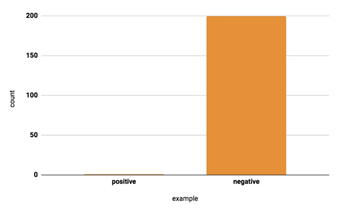

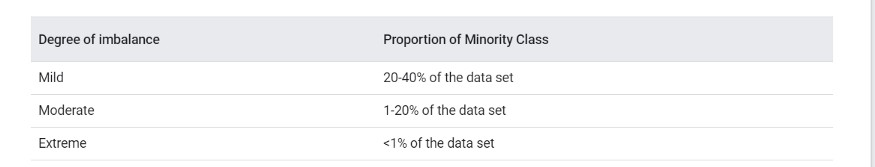

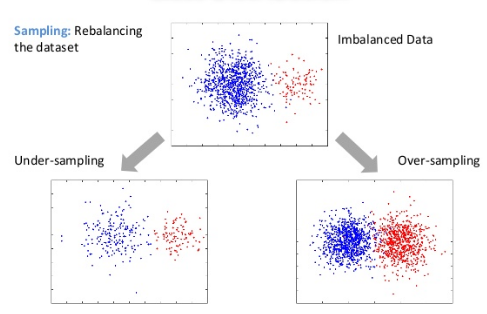

*Synthetic Minority Oversampling* (SMOTE)

SMOTE bekerja dengan memilih contoh yang dekat di ruang fitur, menggambar garis di antara contoh di ruang fitur dan menggambar sampel baru pada titik di sepanjang garis itu.

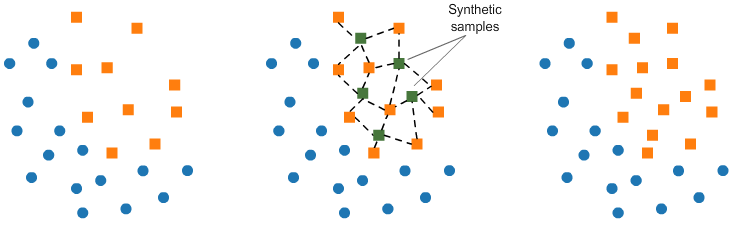

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
# Memisahkan variabel independen (x) dan variabel dependen (y)

X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [38]:
# menghitung jumlah nilai pada variabel dependen (stroke) sebelum oversampling

y.value_counts()

0    3177
1     180
Name: stroke, dtype: int64

In [39]:
# Oversampling menggunakan SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [40]:
# menghitung jumlah nilai pada variabel dependen setelah oversampling

y_resampled.value_counts()

1    3177
0    3177
Name: stroke, dtype: int64

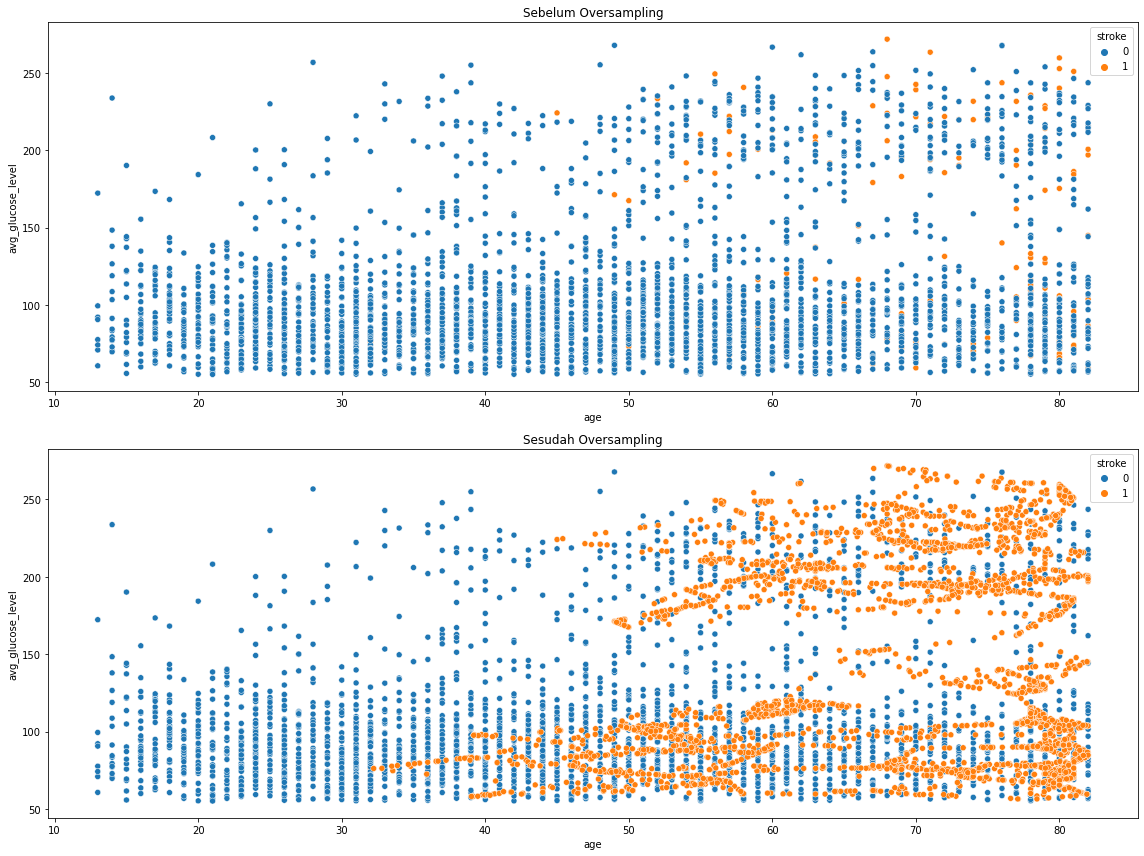

In [41]:
# Menggabungkan variabel independen dan dependen untuk visualisasi
SMOTE_df = pd.concat([X_resampled, y_resampled], axis=1)

# Visualisasi agar dapat mengetahui perbedaan sebelum dan sesudah di SMOTE

fig, axs = plt.subplots(2, figsize= (16,12))

plt1 = sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', ax=axs[0])
axs[0].set_title('Sebelum Oversampling')
plt2 = sns.scatterplot(data=SMOTE_df, x='age', y='avg_glucose_level', hue='stroke', ax=axs[1])
axs[1].set_title('Sesudah Oversampling')

plt.tight_layout()
plt.show()

## 2.3 *Data Splitting* dengan train_test_split

Sebelum dataset dilatih di model *machine learning*, kita perlu untuk membagi dataset menjadi 2, yaitu data latih *(train data)* dan data test *(test data)*. Rasio pembagian data latih *(train data)* dan data test *(test data)* adalah 80:20.

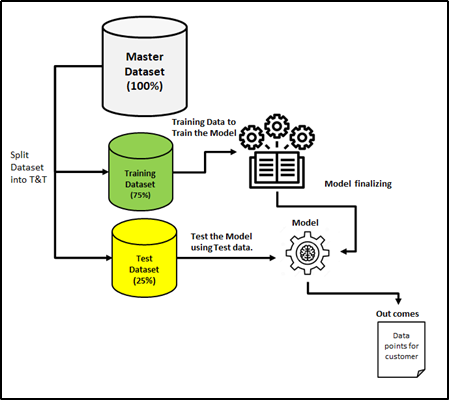

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Memisahkan dataset menjadi train data dan test data menggunakan train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 42)

# 3.Pembuatan Model *(Modeling)*

Pada tahap ini, kita menggunakan model *machine learning* berupa *Decision Tree* dan *Random Forest*.

## 3.1 Decision Tree

Decision Tree adalah diagram berbentuk pohon yang digunakan untuk menentukan suatu tindakan. Kita menggunakan library sklearn berupa [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Untuk mengetahui parameter pada Decision Tree Clasifier dapat melihat dokumentasi sklearn.

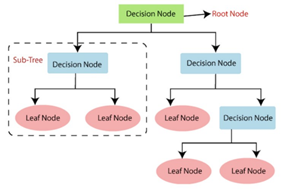

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.metrics import confusion_matrix,  classification_report

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
# Pembuatan model decision tree
dt = DecisionTreeClassifier()

# Lakukan training dengan train data
dt.fit(X_train, y_train)

In [ ]:
# Cek akurasi pada test data
acc = dt.score(X_test, y_test)
acc = round(acc, 4)*100

print("Akurasi dari model Decision Tree adalah\t: {}%".format(acc))

In [ ]:
# Visualisasi tree pada decision tree

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X_resampled.columns.values.tolist(),  
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

In [ ]:
# Pengujian model terhadap data test
y_pred = dt.predict(X_test)

In [ ]:
# classification report model decision tree
cr_dt = classification_report(y_test, y_pred, output_dict=True, target_names=['no','yes'])
cr_dt_df = pd.DataFrame(cr_dt).T
cr_dt_df

In [ ]:
# confusion matrix model decision tree
cf_dt = confusion_matrix(y_test, y_pred)

## 3.2 Random Forest

Random Forest menciptakan beberapa pohon keputusan dalam fase pelatihan, kemudian keputusan dibuat dengan mendapatkan keputusan mayoritas dari pohon. Kita menggunakan library sklearn berupa [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Untuk mengetahui parameter pada Random Forest Classifier dapat melihat dokumentasi sklearn.

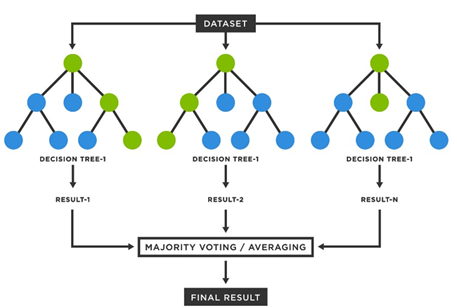

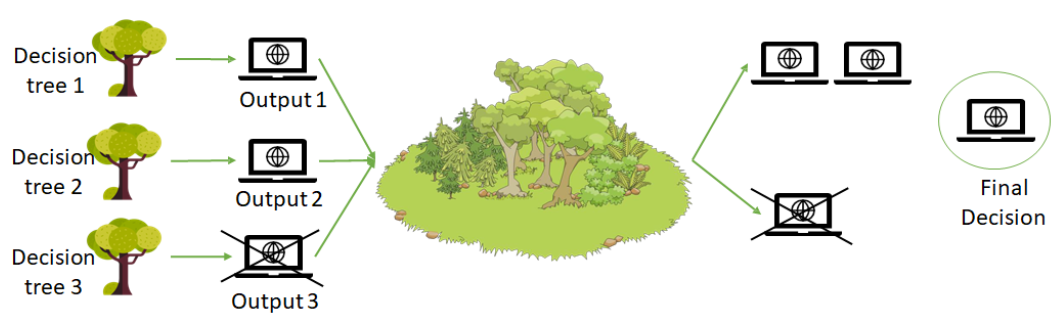

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Pembuatan model random forest
rf = RandomForestClassifier()

# Lakukan training dengan train data
rf.fit(X_train, y_train)

In [ ]:
# Cek akurasi pada test data
acc = rf.score(X_test, y_test)
acc = round(acc, 2)*100

print("Akurasi dari model Random Forest adalah\t: {}%".format(acc))

In [ ]:
# Visualisasi tree pada random forest
# random forest terdiri dari banyak tree oleh sebab itu tidak bs dimunculkan semua, untuk memanggil 1 1 maka dapat menggunakan 
# [namarandomforest].estimators_[index] :0-99 untuk 100 pohon keputusan
dot_data = export_graphviz(rf.estimators_[1], out_file=None, 
                           feature_names=X_resampled.columns.values.tolist(),  
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

In [ ]:
# Pengujian model terhadap data test
y_pred = rf.predict(X_test)

In [ ]:
# classification report model random forset
cr_rf = classification_report(y_test, y_pred, output_dict=True, target_names=['no','yes'])
cr_rf_df = pd.DataFrame(cr_rf).T
cr_rf_df

In [ ]:
# confusion matrix model random forest
cf_rf = confusion_matrix(y_test, y_pred)

# 4.Evaluasi Model *(Model Evaluation)*

Mengevaluasi model klasifikasi kita menggukan metrik pada confusion matriks dan classification report.

### 4.1 Perbandingan Confusion Matriks

_Confusion matriks_ merupakan tabel untuk memvisualisasikan performa model prediksi. Setiap entri dalam _confusion matriks_ menunjukkan jumlah prediksi yang dibuat oleh model yang mengklasifikasikan kelas dengan benar atau salah.

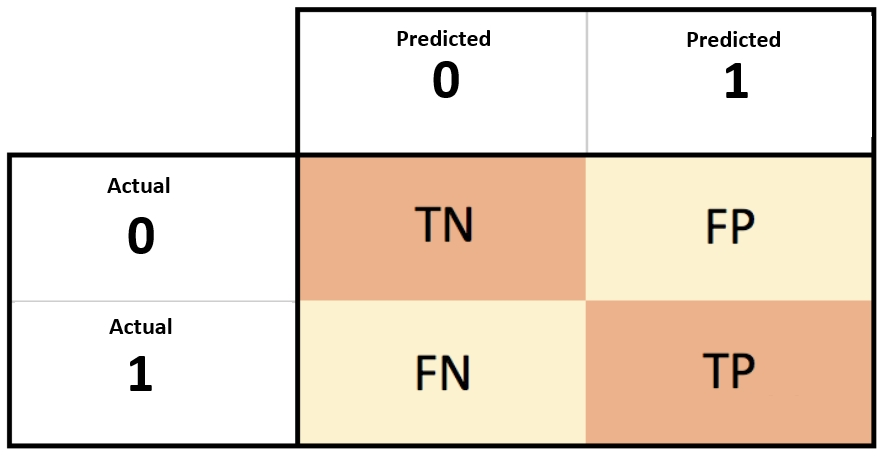

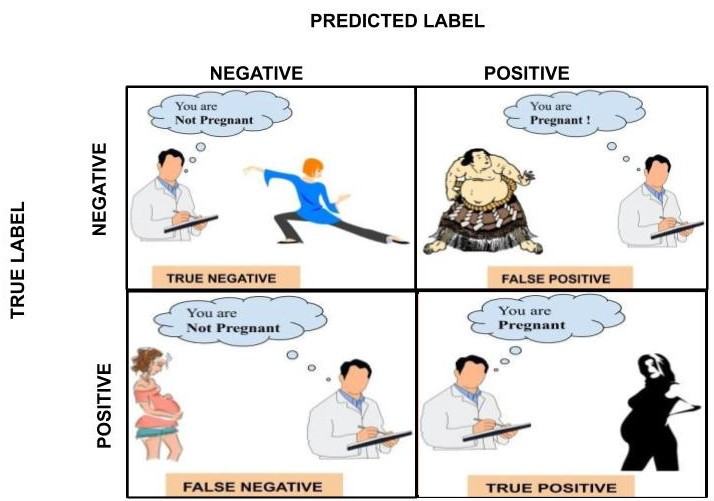

Keterangan:

    - True Negative: Ini mengacu pada jumlah prediksi di mana pengklasifikasi dengan benar memprediksi kelas negatif sebagai negatif.

    - False Positive: Ini mengacu pada jumlah prediksi di mana pengklasifikasi salah memprediksi kelas negatif sebagai positif.
    
    - False Negative: Ini mengacu pada jumlah prediksi di mana pengklasifikasi salah memprediksi kelas positif sebagai negatif.

    - True Positif: Ini mengacu pada jumlah prediksi di mana pengklasifikasi dengan benar memprediksi kelas positif sebagai positif.

In [ ]:
# Visualisasi confusion matrix pada decision tree dan random forest
fig, axs = plt.subplots(ncols= 2, figsize=(15,8))

sns.heatmap(cf_dt, annot=True, fmt='g', ax=axs[0])

axs[0].set_yticklabels(['no', 'yes'])
axs[0].set_xticklabels(['no', 'yes'])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Decision Tree', fontweight='bold')

sns.heatmap(cf_rf, annot=True, fmt='g', ax=axs[1])

axs[1].set_yticklabels(['no', 'yes'])
axs[1].set_xticklabels(['no', 'yes'])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Random Forest', fontweight='bold')

plt.show()

## 4.2 Perbandingan clasification report

Classification report digunakan untuk mengukur kualitas prediksi dari algoritma klasifikasi. Classification report menampilkan nilai akurasi, _precision_, _recall_, dan _f1 score_ untuk model.

  Berikut dibawah ini merupakan formula untuk mengukur parameter yang digunakan dalam menilai kinerja model.
  
  |  | Formula | Penjelasan |
  | :---: | :---: | :---: |
  | Accuracy | ![accuracy](https://user-images.githubusercontent.com/72246401/137153643-c8ef8b9e-8e90-4044-9393-e4b01dc5a24f.png) | Nilai ketepatan model dalam memprediksi data dengan data yang sebenarnya |
  | Precission | ![precision](https://user-images.githubusercontent.com/72246401/137153668-55d6752a-056e-491d-a108-efb468bf7b8a.png) | Menghitung seberapa baik model memprediksi label positif terhadap semua prediksi model berlabel positif |
  | Recall (Sensivity) | ![recall](https://user-images.githubusercontent.com/72246401/137153665-dfc779d7-cac1-4f23-af93-988e33fda6a5.png) |  Menghitung seberapa baik model memprediksi label positif terhadap semua label data positif |
  | F1 Score | ![F1-Score](https://user-images.githubusercontent.com/72246401/137153660-2a34b4bf-e121-4afa-93bd-ed3dd4f02400.png) | Menghitung seberapa baik hasil prediksi model (precision) dan seberapa lengkap hasil prediksinya (recall) |

In [ ]:
pd.concat([cr_dt_df.iloc[:3], cr_rf_df.iloc[:3]], keys=["Decision Tree", "Random Forest"])

# 5.Save and Load Model

In [ ]:
import pickle

In [ ]:
# save model menggunakan pickle
with open('Random Forest Stroke Prediction.pickle', 'wb') as model:
  pickle.dump(rf, model)

In [ ]:
# load model menggunakan pickle
loaded_model = pickle.load(open("/content/Random Forest Stroke Prediction.pickle", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)